In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

from lca import LCA

//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


## Read data

In [2]:
columns = "influencer,consumidor_experiencias,comprometido,eco_urbano,tecnologico,amante_contenido,natura,cine,automocion,tecnologia,deportes,futbol,viajes,salud,perros,gatos,belleza,bebes,familia,alimentacion,nightlife,ecologia_vida_sana,informatica,ocio_amigos,cocina_facil,online_shop,apuesta,moda,videojuegos,dating,seguros,finanzas_inmo,casa_jardin,higiene_personal,lujo,millennials".split(",")

In [3]:
data = pd.read_csv("./racm-data-encoded.csv",
                   nrows = 100000,
                   usecols=columns)

IOError: File ./racm-data-encoded.csv does not exist

In [4]:
data = data[data.sum(axis=1)!=0]

NameError: name 'data' is not defined

In [5]:
data.shape

NameError: name 'data' is not defined

## Generate data

In [6]:
columns = ["C1","C2","C3","C4"]
true_theta = [
    [0.1,0.4,0.9,0.2],
    [0.5,0.9,0.1,0.1],
    [0.9,0.9,0.5,0.9]
]
true_weights = [0.1, 0.5, 0.4]
N = 10000

data = []
for tw,tt in zip(true_weights,true_theta):
    data.append(stats.bernoulli.rvs(p=tt, size=(int(tw*N),len(tt))).tolist())
    
data = np.concatenate(data)

In [17]:
data

array([[0, 0, 1, 0],
       [0, 1, 1, 0],
       [0, 1, 0, 0],
       ..., 
       [1, 1, 0, 1],
       [0, 1, 1, 1],
       [1, 1, 1, 1]])

## Apply LCA algorithm

In [7]:
lca = LCA(n_components=5, tol=10e-4, max_iter=1000)

In [8]:
%%time

lca.fit(data)

CPU times: user 45.8 s, sys: 131 ms, total: 45.9 s
Wall time: 45.9 s


In [9]:
lca.weight

array([ 0.15819059,  0.23321392,  0.04045594,  0.30935541,  0.25878414])

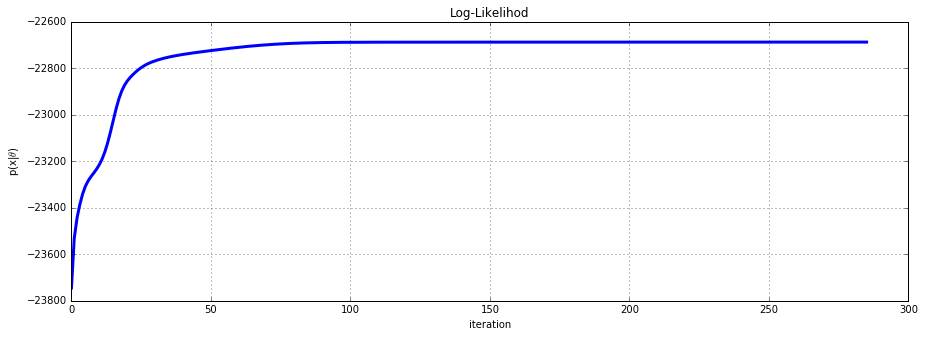

In [10]:
_,ax = plt.subplots(figsize=(15,5))
ax.plot(lca.ll_[1:], linewidth=3)
ax.set_title("Log-Likelihod")
ax.set_xlabel("iteration")
ax.set_ylabel(r"p(x|$\theta$)")
ax.grid(True)

## Plot results

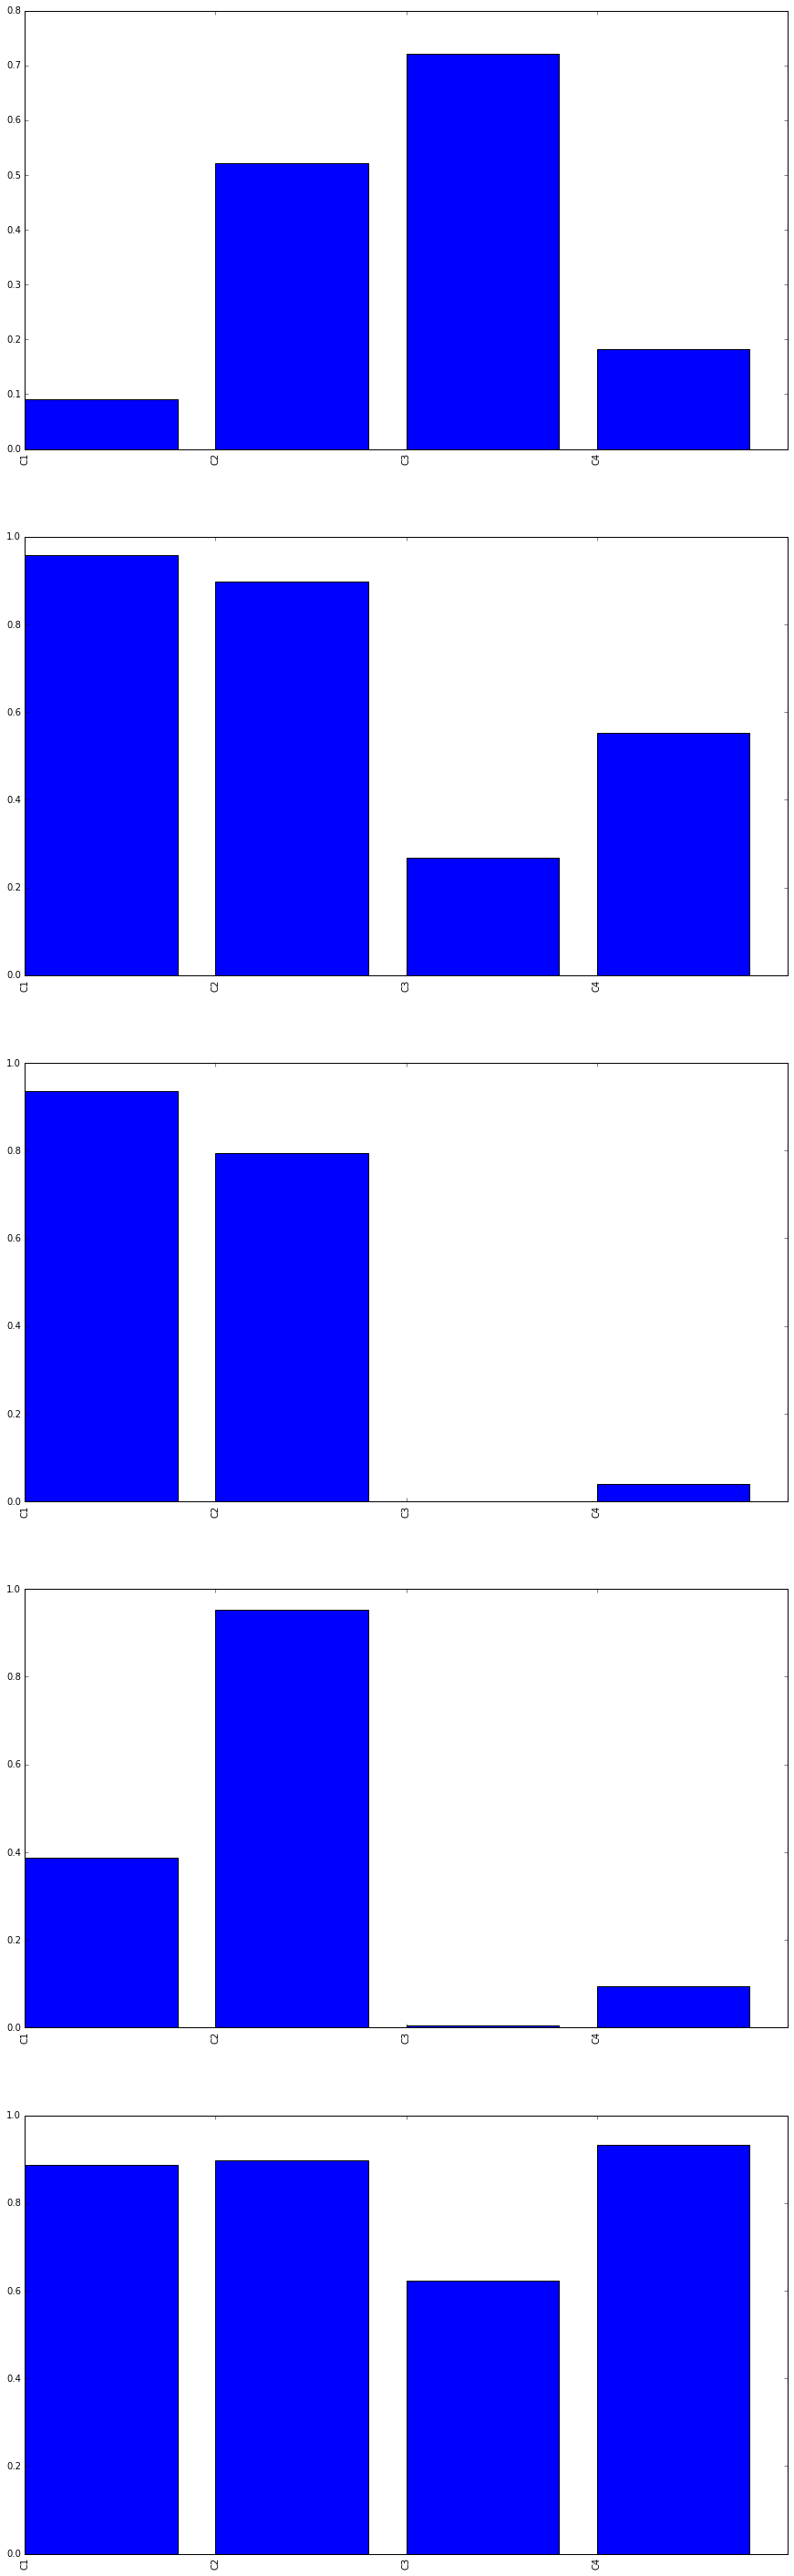

In [11]:
_,axs = plt.subplots(nrows=lca.theta.shape[0], figsize=(15,lca.theta.shape[0]*10))
axs = axs.ravel()
for i,ax in enumerate(axs):
    ax.bar(range(len(columns)),lca.theta[i,:])
    ax.set_xticks(range(len(columns)))
    ax.set_xticklabels(columns, rotation="vertical")

In [12]:
res = lca.predict(data)

In [13]:
res

array([0, 0, 3, ..., 1, 4, 4])

In [14]:
lca.bic

45503.401653051784

## Model selection

In [15]:
ks = [2,3,4,5,6]
bics = []
for k in ks:
    lca = LCA(n_components=k, tol=10e-4, max_iter=1000)
    lca.fit(data)
    bics.append(lca.bic)

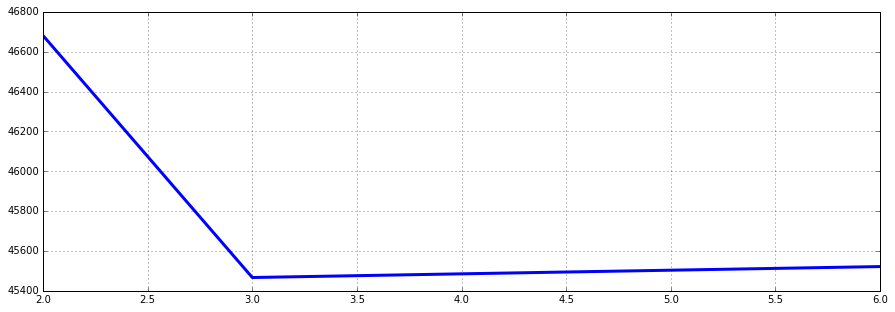

In [16]:
_,ax = plt.subplots(figsize=(15,5))
ax.plot(ks, bics, linewidth=3)
ax.grid(True)